In [ ]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset
df = pd.read_csv('breast-cancer.csv')

# Step 3: Display the first few rows
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Robust target-detection + preprocessing for Breast Cancer CSV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('breast-cancer.csv')  # change filename if different

print("Columns in dataframe:\n", df.columns.tolist(), "\n")
print("Dataframe shape:", df.shape, "\n")

# 1) Try common target names
common_names = ['target', 'diagnosis', 'class', 'label', 'target_class', 'Type']
target_col = None
for name in common_names:
    if name in df.columns:
        target_col = name
        break

# 2) If not found, try to detect columns with exactly 2 unique values (likely binary target)
if target_col is None:
    binary_cols = []
    for col in df.columns:
        uniques = df[col].dropna().unique()
        if len(uniques) == 2:
            binary_cols.append((col, uniques))
    if len(binary_cols) == 1:
        target_col = binary_cols[0][0]
    elif len(binary_cols) > 1:
        print("Multiple binary-looking columns found. Picking the first, but verify it's the correct target:\n",
              [c for c,u in binary_cols])
        target_col = binary_cols[0][0]

# 3) If still not found, try columns with names containing 'diagn' or 'cancer'
if target_col is None:
    for col in df.columns:
        if 'diagn' in col.lower() or 'cancer' in col.lower():
            target_col = col
            break

# If we still don't have a target, stop and ask user to provide the column name
if target_col is None:
    print("Could not auto-detect target column. Please tell me the target column name or paste df.columns.")
else:
    print("Detected target column:", target_col)
    # If diagnosis column has 'M'/'B' or similar strings, convert to numeric
    if df[target_col].dtype == object:
        print("Unique values in target column:", df[target_col].unique()[:10])
        # handle M/B -> 1/0
        mapping = {}
        uniques = df[target_col].dropna().unique()
        # common mapping for diagnosis
        if set(uniques) == set(['M','B']) or set([str(u).upper() for u in uniques]) == set(['M','B']):
            mapping = {u: (1 if str(u).upper()=='M' else 0) for u in uniques}
            df[target_col] = df[target_col].map(mapping)
            print("Mapped diagnosis 'M'/'B' to 1/0.")
        else:
            # fallback: label-encode any object type
            df[target_col] = pd.factorize(df[target_col])[0]
            print("Factorized target strings to integers (factorize).")

    # Now separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # If there are non-numeric columns in X (e.g., an ID or text), drop them automatically after showing them
    non_numeric = X.select_dtypes(exclude=['number']).columns.tolist()
    if non_numeric:
        print("Non-numeric feature columns detected and will be dropped (likely IDs/text):", non_numeric)
        X = X.drop(columns=non_numeric)

    # Quick sanity check
    print("\nFeatures shape:", X.shape)
    print("Target distribution:\n", y.value_counts())

    # Train-test split and scaling
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print("\n✅ Preprocessing done.")
    print("Training set:", X_train.shape, "Testing set:", X_test.shape)


Columns in dataframe:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 

Dataframe shape: (569, 32) 

Detected target column: diagnosis
Unique values in target column: ['M' 'B']
Mapped diagnosis 'M'/'B' to 1/0.

Features shape: (569, 31)
Target distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64

✅ Preprocessing done.
Training set: (455, 31) Testing set: (114, 31)


In [ ]:
# Step 3: Train SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("🔹 Linear Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# RBF SVM
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\n🔹 RBF Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


🔹 Linear Kernel Results:
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


🔹 RBF Kernel Results:
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[71  1]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



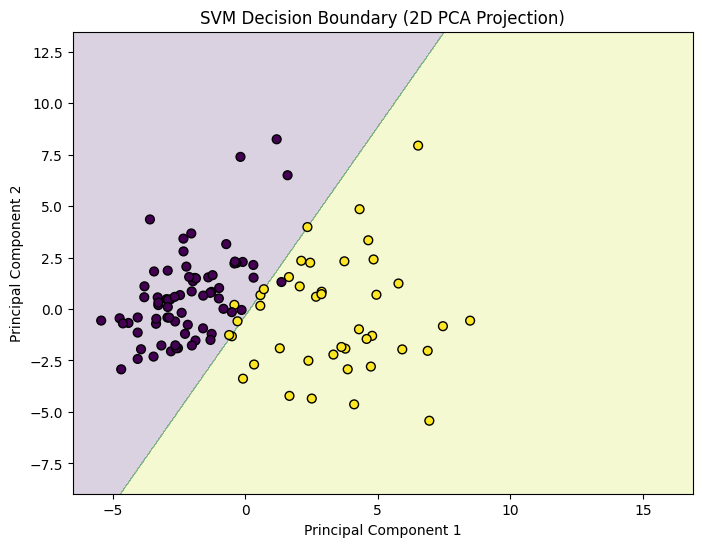

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Retrain SVM (linear kernel) on 2D data for visualization
svm_vis = SVC(kernel='linear', random_state=42)
svm_vis.fit(X_train_2D, y_train)

# Create mesh grid for plotting decision boundary
import numpy as np
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over mesh grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=40, edgecolors='k')
plt.title("SVM Decision Boundary (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
